In [1]:
import math
import numpy as np
import seaborn as sns
import scipy
import scipy.sparse.csgraph
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.neighbors import kneighbors_graph
%matplotlib inline

In [2]:
k = 3
gammaAffinity = 0.01

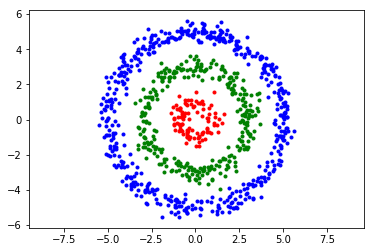

In [3]:
def randomCircle(x0, y0, r, n):
    sigma = 0.3
    angles = 2 * math.pi * np.random.random(n)
    x = [(r * math.cos(w)) + np.random.normal(0, sigma) for w in angles]
    y = [(r * math.sin(w)) + np.random.normal(0, sigma) for w in angles]
    return x, y

x1, y1 = randomCircle(0, 0, 1, 100)
x2, y2 = randomCircle(0, 0, 3, 300)
x3, y3 = randomCircle(0, 0, 5, 500)

fig = plt.figure()
plt.scatter(x1, y1, marker = '.', color = 'red')
plt.scatter(x2, y2, marker = '.', color = 'green')
plt.scatter(x3, y3, marker = '.', color = 'blue')
plt.axis('equal')

# dataset is in x
x = np.concatenate([[(a, b) for a, b in zip(x1, y1)], 
                    [(a, b) for a, b in zip(x2, y2)], 
                    [(a, b) for a, b in zip(x3, y3)]])
n, d = x.shape

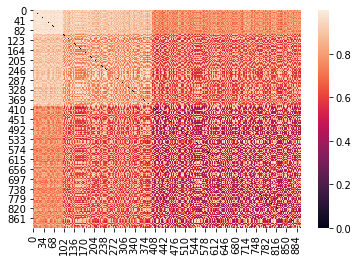

In [4]:
vdist = scipy.spatial.distance.pdist(x, 'euclidean')
dist = scipy.spatial.distance.squareform(vdist)
A = np.exp(-gammaAffinity * np.square(dist))

# the correspondent graph does not have self loops. Removing diagonal
for i in range(n):
    A[i, i] = 0
    
# matriz de similaridades
fig = sns.heatmap(A)

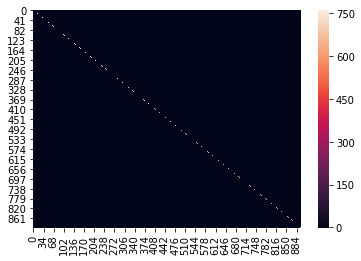

In [5]:
# Laplacian
L = scipy.sparse.csgraph.laplacian(A, normed = False)
fig = sns.heatmap(L)

In [6]:
# spectral decomposition
# computing eigenvalues of the (normalized) Laplacian
w, U = np.linalg.eigh(L)

# considering just firt k eigenvalues of L
U = U[:, :k]

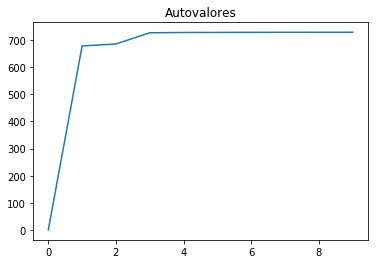

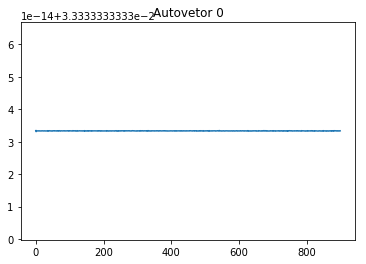

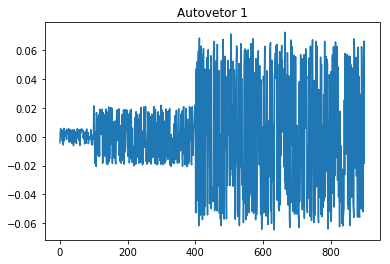

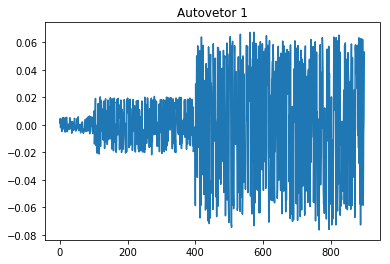

In [84]:
def plotArray(a, title = None):
    n = len(a)
    fig = plt.figure()
    if title is not None:
        plt.title(title)
    plt.plot(range(n), a, ls = '-')

plotArray(w[:10], 'Autovalores')    
    
plotArray(U[:, 0], 'Autovetor 0')
plotArray(U[:, 1], 'Autovetor 1')
plotArray(U[:, 2], 'Autovetor 1')



In [ ]:
# ---------------------------------------------------------

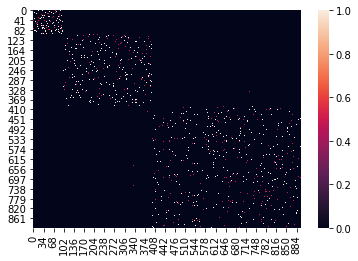

In [18]:
# neareste neighbor graph
m = 10
connectivity = kneighbors_graph(x, m, mode = 'connectivity').todense()

A = 0.5 * (connectivity + connectivity.T)
    
# matriz de similaridades
fig = sns.heatmap(A)

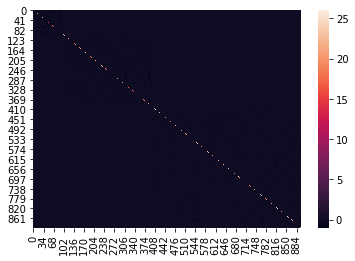

In [16]:
L = scipy.sparse.csgraph.laplacian(A, normed = False)
fig = sns.heatmap(L)

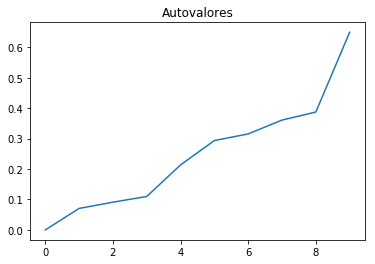

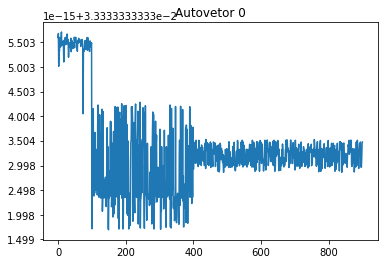

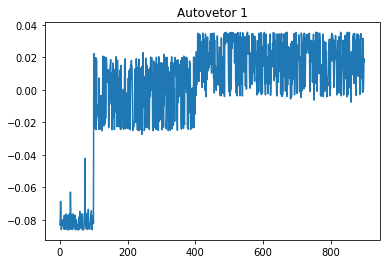

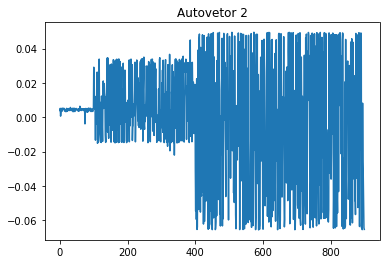

In [17]:
# spectral decomposition
# computing eigenvalues of the (normalized) Laplacian
w, U = np.linalg.eigh(L)

# considering just firt k eigenvalues of L
U = U[:, :k]

def plotArray(a, title = None):
    n = len(a)
    fig = plt.figure()
    if title is not None:
        plt.title(title)
    plt.plot(range(n), a, ls = '-')

plotArray(w[:10], 'Autovalores')
plotArray(U[:, 0], 'Autovetor 0')
plotArray(U[:, 1], 'Autovetor 1')
plotArray(U[:, 2], 'Autovetor 2')
